In [1]:
import os
import json
import numpy as np
import pandas as pd
from pandas.io.json import json_normalize

In [2]:
json_cols = ['device', 'geoNetwork', 'totals', 'trafficSource']

# train = pd.read_csv("C:\\Users\\Urmil\\Desktop\\study\\Masters\\DSF\\HW3\\all\\train.csv", converters={column: json.loads for column in json_cols}, dtype={'fullVisitorId': 'str'}, nrows = 200000)
# train = pd.read_csv("/media/urmil/Windows8_OS/Users/Urmil/Desktop/study/Masters/DSF/HW3/all/train.csv", converters={column: json.loads for column in json_cols}, dtype={'fullVisitorId': 'str'}, nrows = 100000)
train = pd.read_csv('../input/ga-customer-revenue-prediction/train.csv', converters={column: json.loads for column in json_cols}, dtype={'fullVisitorId': 'str'})
for column in json_cols:
        column_as_df = json_normalize(train[column])
        column_as_df.columns = [f"{column}_{subcolumn}" for subcolumn in column_as_df.columns]
        train = train.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
train['fullVisitorId'] = train['fullVisitorId'].astype('str')
train.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_browserSize,device_browserVersion,device_deviceCategory,device_flashVersion,device_isMobile,device_language,device_mobileDeviceBranding,device_mobileDeviceInfo,device_mobileDeviceMarketingName,device_mobileDeviceModel,device_mobileInputSelector,device_operatingSystem,device_operatingSystemVersion,device_screenColors,device_screenResolution,geoNetwork_city,geoNetwork_cityId,geoNetwork_continent,geoNetwork_country,geoNetwork_latitude,geoNetwork_longitude,geoNetwork_metro,geoNetwork_networkDomain,geoNetwork_networkLocation,geoNetwork_region,geoNetwork_subContinent,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_transactionRevenue,totals_visits,trafficSource_adContent,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.criteriaParameters,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_campaign,trafficSource_campaignCode,trafficSource_isTrueDirect,trafficSource_keyword,trafficSource_medium,trafficSource_referralPath,trafficSource_source
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,Not Socially Engaged,1472830385,1,1472830385,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,Izmir,not available in demo dataset,Asia,Turkey,not available in demo dataset,not available in demo dataset,(not set),ttnet.com.tr,not available in demo dataset,Izmir,Western Asia,1,1,1,1,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,Not Socially Engaged,1472880147,1,1472880147,Firefox,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Oceania,Australia,not available in demo dataset,not available in demo dataset,not available in demo dataset,dodo.net.au,not available in demo dataset,not available in demo dataset,Australasia,1,1,1,1,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,Not Socially Engaged,1472865386,1,1472865386,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,Madrid,not available in demo dataset,Europe,Spain,not available in demo dataset,not available in demo dataset,(not set),unknown.unknown,not available in demo dataset,Community of Madrid,Southern Europe,1,1,1,1,NaN,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,NaN,(not provided),organic,NaN,google
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,Not Socially Engaged,1472881213,1,1472881213,UC Browser,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not a

In [3]:
# test = pd.read_csv("C:\\Users\\Urmil\\Desktop\\study\\Masters\\DSF\\HW3\\all\\test.csv", converters={column: json.loads for column in json_cols}, dtype={'fullVisitorId': 'str'}, nrows = 200000)
# test = pd.read_csv("/media/urmil/Windows8_OS/Users/Urmil/Desktop/study/Masters/DSF/HW3/all/test.csv", converters={column: json.loads for column in json_cols}, dtype={'fullVisitorId': 'str'}, nrows=100000)
test = pd.read_csv("../input/ga-customer-revenue-prediction/test.csv", converters={column: json.loads for column in json_cols}, dtype={'fullVisitorId': 'str'})
for column in json_cols:
        column_as_df = json_normalize(test[column])
        column_as_df.columns = [f"{column}_{subcolumn}" for subcolumn in column_as_df.columns]
        test = test.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)
test['fullVisitorId'] = test['fullVisitorId'].astype('str')
test.head()

,channelGrouping,date,fullVisitorId,sessionId,socialEngagementType,visitId,visitNumber,visitStartTime,device_browser,device_browserSize,device_browserVersion,device_deviceCategory,device_flashVersion,device_isMobile,device_language,device_mobileDeviceBranding,device_mobileDeviceInfo,device_mobileDeviceMarketingName,device_mobileDeviceModel,device_mobileInputSelector,device_operatingSystem,device_operatingSystemVersion,device_screenColors,device_screenResolution,geoNetwork_city,geoNetwork_cityId,geoNetwork_continent,geoNetwork_country,geoNetwork_latitude,geoNetwork_longitude,geoNetwork_metro,geoNetwork_networkDomain,geoNetwork_networkLocation,geoNetwork_region,geoNetwork_subContinent,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_visits,trafficSource_adContent,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.criteriaParameters,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_campaign,trafficSource_isTrueDirect,trafficSource_keyword,trafficSource_medium,trafficSource_referralPath,trafficSource_source
0,Organic Search,20171016,6167871330617112363,6167871330617112363_1508151024,Not Socially Engaged,1508151024,2,1508151024,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset,(not set),not available in demo dataset,Asia,Singapore,not available in demo dataset,not available in demo dataset,(not set),myrepublic.com.sg,not available in demo dataset,(not set),Southeast Asia,NaN,4,NaN,4,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),True,(not provided),organic,NaN,google
1,Organic Search,20171016,0643697640977915618,0643697640977915618_1508175522,Not Socially Engaged,1508175522,1,1508175522,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Windows,not available in demo dataset,not available in demo dataset,not available in demo dataset,Zaragoza,not available in demo dataset,Europe,Spain,not available in demo dataset,not available in demo dataset,(not set),rima-tde.net,not available in demo dataset,Aragon,Southern Europe,NaN,5,1,5,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
2,Organic Search,20171016,6059383810968229466,6059383810968229466_1508143220,Not Socially Engaged,1508143220,1,1508143220,Chrome,not available in demo dataset,not available in demo dataset,desktop,not available in demo dataset,False,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Macintosh,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,not available in demo dataset,Europe,France,not available in demo dataset,not available in demo dataset,not available in demo dataset,sfr.net,not available in demo dataset,not available in demo dataset,Western Europe,NaN,7,1,7,1,NaN,NaN,not available in demo dataset,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
3,Organic Search,20171016,2376720078563423631,2376720078563423631_1508193530,Not Socially Engaged,1508193530,1,1508193530,Safari,not available in demo dataset,not available in demo dataset,mobile,not available in demo dataset,True,not available in demo dataset,not available in demo dataset,not available in 

In [4]:
for col in train.columns:
    if col not in test.columns:
        print(col)
# Removing the columns that has constant values     
train = train.loc[:, (train != train.iloc[0]).any()] 
train = train.dropna(axis=1, how='all')

# Removing the 'trafficSource_campaignCode' as it is not in the test data
train = train.drop(axis = 1,columns=['trafficSource_campaignCode'])
train.head()

totals_transactionRevenue
trafficSource_campaignCode


,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device_browser,device_deviceCategory,device_isMobile,device_operatingSystem,geoNetwork_city,geoNetwork_continent,geoNetwork_country,geoNetwork_metro,geoNetwork_networkDomain,geoNetwork_region,geoNetwork_subContinent,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,totals_transactionRevenue,trafficSource_adContent,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_campaign,trafficSource_isTrueDirect,trafficSource_keyword,trafficSource_medium,trafficSource_referralPath,trafficSource_source
0,Organic Search,20160902,1131660440785968503,1131660440785968503_1472830385,1472830385,1,1472830385,Chrome,desktop,False,Windows,Izmir,Asia,Turkey,(not set),ttnet.com.tr,Izmir,Western Asia,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
1,Organic Search,20160902,377306020877927890,377306020877927890_1472880147,1472880147,1,1472880147,Firefox,desktop,False,Macintosh,not available in demo dataset,Oceania,Australia,not available in demo dataset,dodo.net.au,not available in demo dataset,Australasia,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
2,Organic Search,20160902,3895546263509774583,3895546263509774583_1472865386,1472865386,1,1472865386,Chrome,desktop,False,Windows,Madrid,Europe,Spain,(not set),unknown.unknown,Community of Madrid,Southern Europe,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
3,Organic Search,20160902,4763447161404445595,4763447161404445595_1472881213,1472881213,1,1472881213,UC Browser,desktop,False,Linux,not available in demo dataset,Asia,Indonesia,not available in demo dataset,unknown.unknown,not available in demo dataset,Southeast Asia,1,1,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,google + online,organic,NaN,google
4,Organic Search,20160902,27294437909732085,27294437909732085_1472822600,1472822600,2,1472822600,Chrome,mobile,True,Android,not available in demo dataset,Europe,United Kingdom,not available in demo dataset,unknown.unknown,not available in demo dataset,Northern Europe,1,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(not set),True,(not provided),organic,NaN,google


In [5]:
test = test.loc[:, (test != test.iloc[0]).any()] 
test = test.dropna(axis=1, how='all')
test.head()

,channelGrouping,date,fullVisitorId,sessionId,visitId,visitNumber,visitStartTime,device_browser,device_deviceCategory,device_isMobile,device_operatingSystem,geoNetwork_city,geoNetwork_continent,geoNetwork_country,geoNetwork_metro,geoNetwork_networkDomain,geoNetwork_region,geoNetwork_subContinent,totals_bounces,totals_hits,totals_newVisits,totals_pageviews,trafficSource_adContent,trafficSource_adwordsClickInfo.adNetworkType,trafficSource_adwordsClickInfo.gclId,trafficSource_adwordsClickInfo.isVideoAd,trafficSource_adwordsClickInfo.page,trafficSource_adwordsClickInfo.slot,trafficSource_campaign,trafficSource_isTrueDirect,trafficSource_keyword,trafficSource_medium,trafficSource_referralPath,trafficSource_source
0,Organic Search,20171016,6167871330617112363,6167871330617112363_1508151024,1508151024,2,1508151024,Chrome,desktop,False,Macintosh,(not set),Asia,Singapore,(not set),myrepublic.com.sg,(not set),Southeast Asia,NaN,4,NaN,4,NaN,NaN,NaN,NaN,NaN,NaN,(not set),True,(not provided),organic,NaN,google
1,Organic Search,20171016,0643697640977915618,0643697640977915618_1508175522,1508175522,1,1508175522,Chrome,desktop,False,Windows,Zaragoza,Europe,Spain,(not set),rima-tde.net,Aragon,Southern Europe,NaN,5,1,5,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
2,Organic Search,20171016,6059383810968229466,6059383810968229466_1508143220,1508143220,1,1508143220,Chrome,desktop,False,Macintosh,not available in demo dataset,Europe,France,not available in demo dataset,sfr.net,not available in demo dataset,Western Europe,NaN,7,1,7,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
3,Organic Search,20171016,2376720078563423631,2376720078563423631_1508193530,1508193530,1,1508193530,Safari,mobile,True,iOS,Mountain View,Americas,United States,San Francisco-Oakland-San Jose CA,(not set),California,Northern America,NaN,8,1,4,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google
4,Organic Search,20171016,2314544520795440038,2314544520795440038_1508217442,1508217442,1,1508217442,Safari,desktop,False,Macintosh,San Jose,Americas,United States,San Francisco-Oakland-San Jose CA,(not set),California,Northern America,NaN,9,1,4,NaN,NaN,NaN,NaN,NaN,NaN,(not set),NaN,(not provided),organic,NaN,google


Anomalies in the data:
1. There are many columns that have constant value.
2. 'trafficSource_campaignCode' is not in the train data.
3. Almost all the columns has NaN values.

Cleaning of the data:
1. Remove the columns with the constant value as they have no effect on the prediction.
2. Remove 'trafficSource_campaignCode' from training data

Columns with constant values:
1.  socialEngagementType
2.  device_browserSize
3.  device.browserVersion
4.  device.flashVersion
5.  device.language
6.  device.mobileDeviceBranding
7.  device.mobileDeviceInfo
8.  device.mobileDeviceMarketingName
9.  device.mobileDeviceModel
10. device.mobileInputSelector
11. device.operatingSystemVersion
12. device.screenColors
13. device.screenResolution
14. geoNetwork.cityId
15. geoNetwork.latitude
16. geoNetwork.longitude
17. geoNetwork.networkLocation
18. totals.visits
19. trafficSource.adwordsClickInfo.criteriaParameters

In [6]:
len_train = len(train)
len_test = len(test)
def missing_cnt(col):
    nanlist = ["not available in demo dataset", "(not provided)", "(not set)", "<NA>", "unknown.unknown",  "(none)", "NaN"]
    word_cnt = train[col].value_counts()
    for nan in nanlist:
        if nan in word_cnt:
            return word_cnt[nan]
    return 0
aa = []
for col in train.columns:
    aa.append(missing_cnt(col)/len_train*100.0)
# aa.sort()

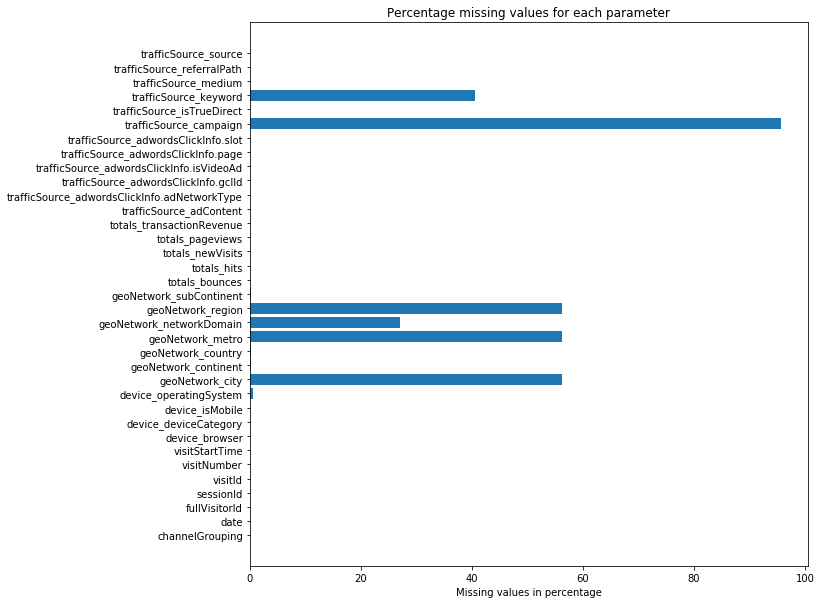

In [7]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})
plt.figure(figsize=(10,10))
plt.barh(train.columns, aa)
plt.xlabel('Missing values in percentage')
plt.title('Percentage missing values for each parameter')
 
plt.show()
train_extra = train
# train = train.drop(columns = ['trafficSource_campaign'])

In [8]:
import datetime

for col in train.columns:
    if col == 'date':
        train['date'] = train['date'].apply(lambda x: datetime.date(int(str(x)[:4]), int(str(x)[4:6]), int(str(x)[6:])))
        continue
    if train[col].dtype == 'O':
        if col in ['totals_bounces','totals_hits', 'totals_newVisits', 'totals_pageviews', 'totals_transactionRevenue']:
            train[col] = train[col].astype('float')
        else:
            train[col] = train[col].astype('str')
            
for col in test.columns:
    if col == 'date':
        test['date'] = test['date'].apply(lambda x: datetime.date(int(str(x)[:4]), int(str(x)[4:6]), int(str(x)[6:])))
        continue
    if test[col].dtype == 'O':
        if col in ['totals_bounces','totals_hits', 'totals_newVisits', 'totals_pageviews']:
            test[col] = test[col].astype('float')
        else:
            test[col] = test[col].astype('str')

def extractMonth(DateTime):
    return DateTime.month

def extractYear(DateTime):
    return DateTime.year

train['month'] = train['date'].apply(extractMonth)
train['year'] = train['date'].apply(extractYear)

test['month'] = test['date'].apply(extractMonth)
test['year'] = test['date'].apply(extractYear)


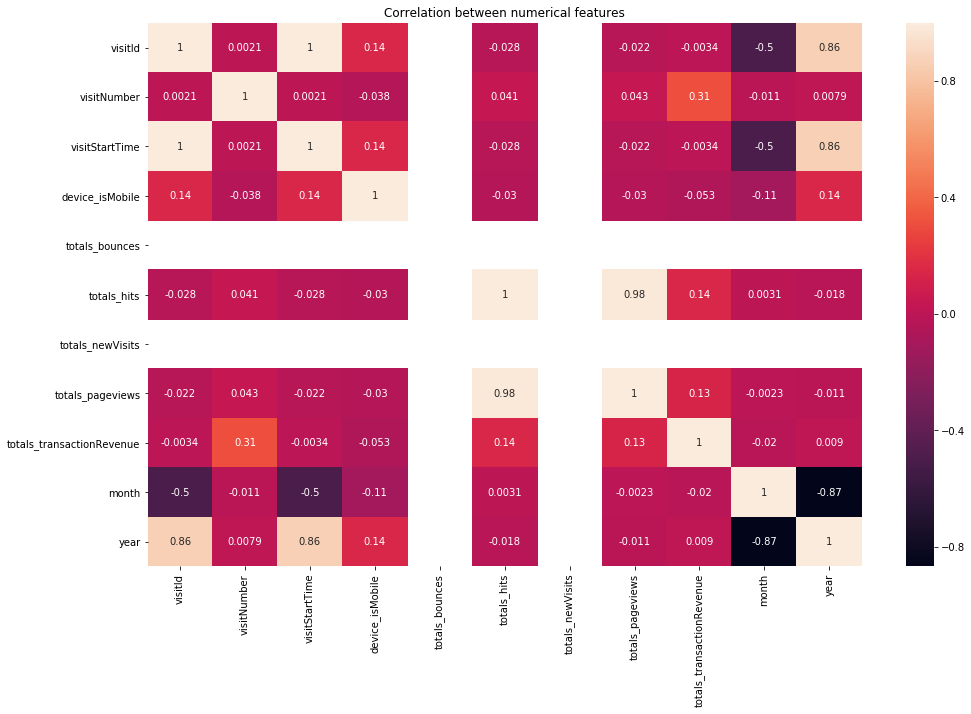

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

#finding correlations(dependence) between the variables
corr_matrix = train.corr()
f, ax = plt.subplots(figsize=(16,10))
ax = sns.heatmap(corr_matrix, annot=True)
ax.set_title("Correlation between numerical features")
figure = ax.get_figure()    
# figure.savefig('heatmap.png')

Text(0.5,1,'deviceCategory-Mean')

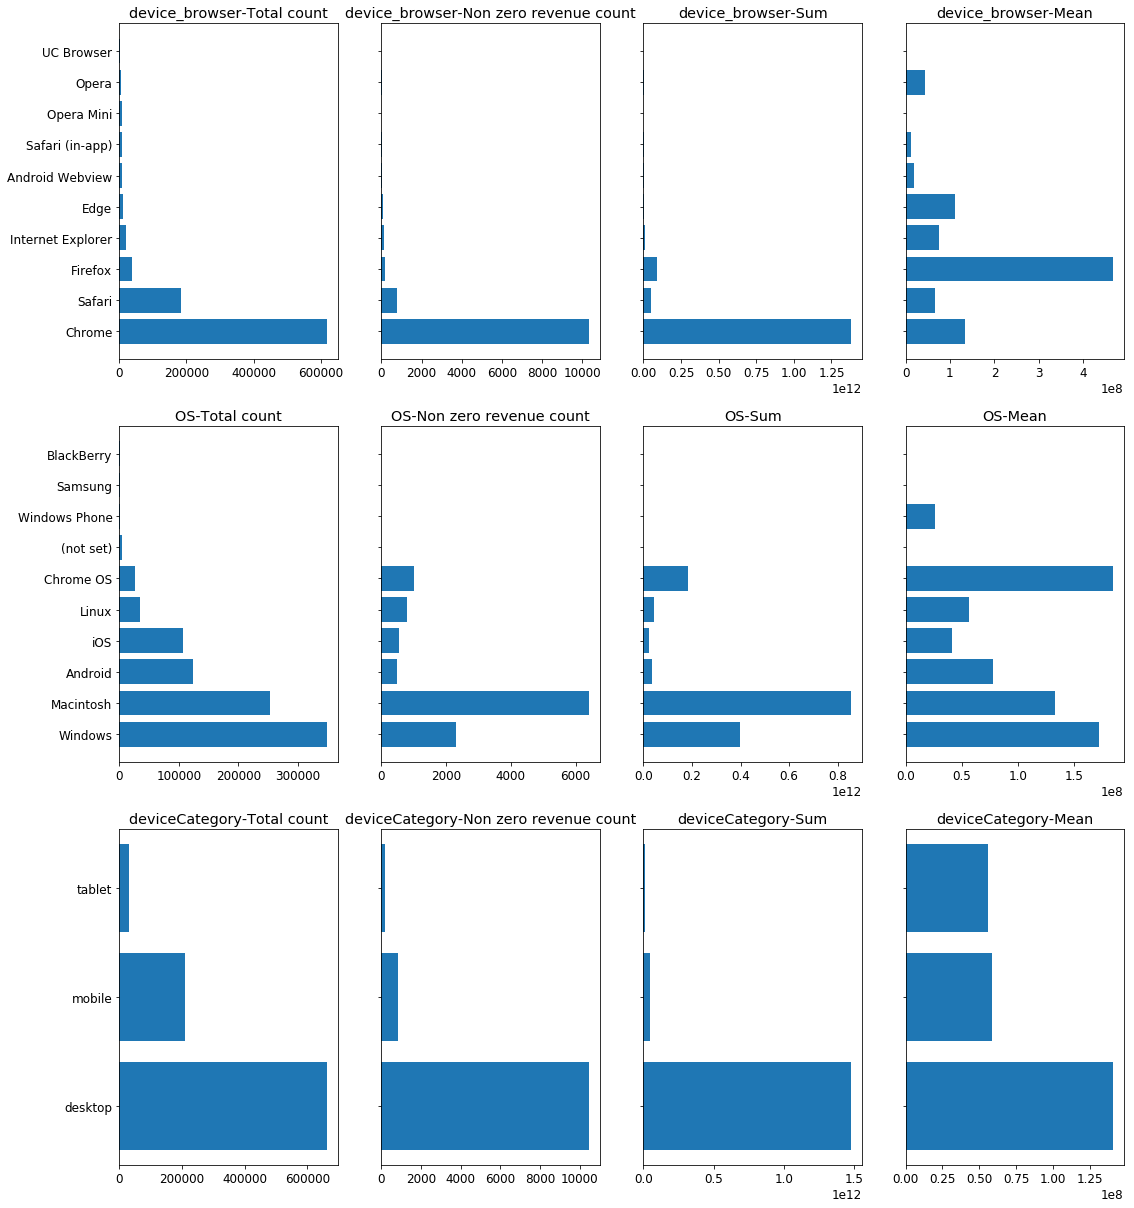

In [10]:
cnt_srs_browser = train.groupby('device_browser')['totals_transactionRevenue'].agg(['size', 'count', 'mean', 'sum'])
cnt_srs_browser.columns = ['count', 'positive revenue count', 'mean', 'sum']
cnt_srs_browser = cnt_srs_browser.sort_values(by='count', ascending=False)

cnt_srs_OS = train.groupby('device_operatingSystem')['totals_transactionRevenue'].agg(['size', 'count', 'mean', 'sum'])
cnt_srs_OS.columns = ['count', 'positive revenue count', 'mean', 'sum']
cnt_srs_OS = cnt_srs_OS.sort_values(by='count', ascending=False)

cnt_srs_deviceCategory = train.groupby('device_deviceCategory')['totals_transactionRevenue'].agg(['size', 'count', 'mean', 'sum'])
cnt_srs_deviceCategory.columns = ['count', 'positive revenue count', 'mean', 'sum']
cnt_srs_deviceCategory = cnt_srs_deviceCategory.sort_values(by='count', ascending=False)

plt.rcParams.update({'font.size': 12})
f, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(nrows=3, ncols=4, sharey='row',figsize=(18,21))
ax1.barh(cnt_srs_browser.index[:10], cnt_srs_browser['count'].head(10))
ax1.set_title('device_browser-Total count')
ax2.barh(cnt_srs_browser.index[:10], cnt_srs_browser['positive revenue count'].head(10))
ax2.set_title('device_browser-Non zero revenue count')
ax3.barh(cnt_srs_browser.index[:10], cnt_srs_browser['sum'].head(10))
ax3.set_title('device_browser-Sum')
ax4.barh(cnt_srs_browser.index[:10], cnt_srs_browser['mean'].head(10))
ax4.set_title('device_browser-Mean')

ax5.barh(cnt_srs_OS.index[:10], cnt_srs_OS['count'].head(10))
ax5.set_title('OS-Total count')
ax6.barh(cnt_srs_OS.index[:10], cnt_srs_OS['positive revenue count'].head(10))
ax6.set_title('OS-Non zero revenue count')
ax7.barh(cnt_srs_OS.index[:10], cnt_srs_OS['sum'].head(10))
ax7.set_title('OS-Sum')
ax8.barh(cnt_srs_OS.index[:10], cnt_srs_OS['mean'].head(10))
ax8.set_title('OS-Mean')

ax9.barh(cnt_srs_deviceCategory.index[:10], cnt_srs_deviceCategory['count'].head(10))
ax9.set_title('deviceCategory-Total count')
ax10.barh(cnt_srs_deviceCategory.index[:10], cnt_srs_deviceCategory['positive revenue count'].head(10))
ax10.set_title('deviceCategory-Non zero revenue count')
ax11.barh(cnt_srs_deviceCategory.index[:10], cnt_srs_deviceCategory['sum'].head())
ax11.set_title('deviceCategory-Sum')
ax12.barh(cnt_srs_deviceCategory.index[:10], cnt_srs_deviceCategory['mean'].head())
ax12.set_title('deviceCategory-Mean')


Text(0.5,1,'Country-Mean')

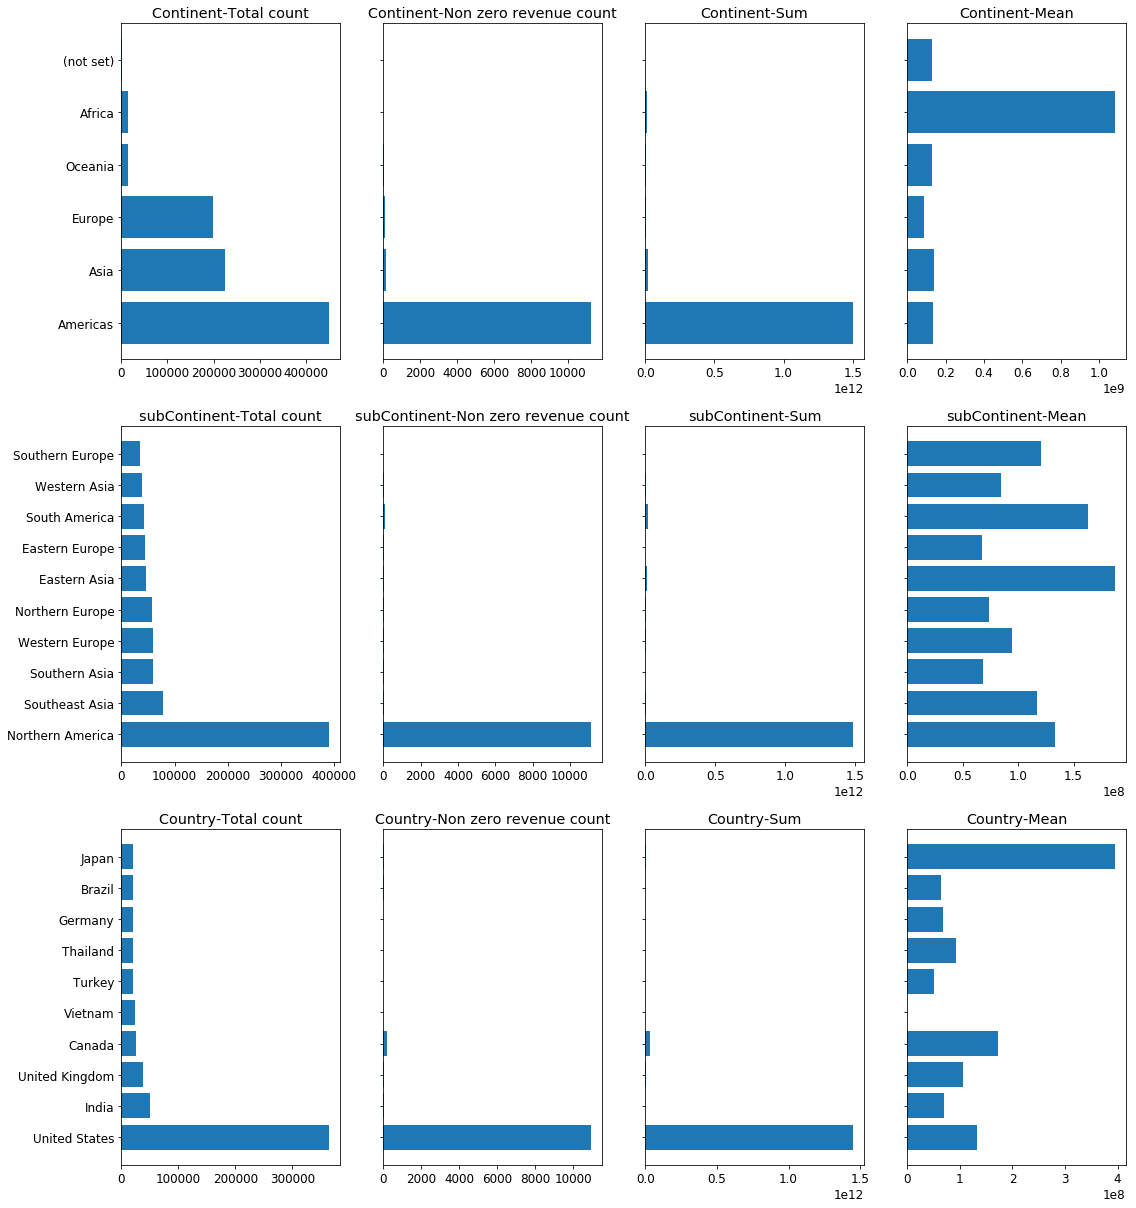

In [11]:
cnt_srs_continent = train.groupby('geoNetwork_continent')['totals_transactionRevenue'].agg(['size', 'count', 'mean', 'sum'])
cnt_srs_continent.columns = ['count', 'positive revenue count', 'mean', 'sum']
cnt_srs_continent = cnt_srs_continent.sort_values(by='count', ascending=False)

cnt_srs_subContinent = train.groupby('geoNetwork_subContinent')['totals_transactionRevenue'].agg(['size', 'count', 'mean', 'sum'])
cnt_srs_subContinent.columns = ['count', 'positive revenue count', 'mean', 'sum']
cnt_srs_subContinent = cnt_srs_subContinent.sort_values(by='count', ascending=False)

cnt_srs_country = train.groupby('geoNetwork_country')['totals_transactionRevenue'].agg(['size', 'count', 'mean', 'sum'])
cnt_srs_country.columns = ['count', 'positive revenue count', 'mean', 'sum']
cnt_srs_country = cnt_srs_country.sort_values(by='count', ascending=False)

plt.rcParams.update({'font.size': 12})
f, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8), (ax9, ax10, ax11, ax12)) = plt.subplots(nrows=3, ncols=4, sharey='row',figsize=(18,21))
ax1.barh(cnt_srs_continent.index[:10], cnt_srs_continent['count'].head(10))
ax1.set_title('Continent-Total count')
ax2.barh(cnt_srs_continent.index[:10], cnt_srs_continent['positive revenue count'].head(10))
ax2.set_title('Continent-Non zero revenue count')
ax3.barh(cnt_srs_continent.index[:10], cnt_srs_continent['sum'].head(10))
ax3.set_title('Continent-Sum')
ax4.barh(cnt_srs_continent.index[:10], cnt_srs_continent['mean'].head(10))
ax4.set_title('Continent-Mean')

ax5.barh(cnt_srs_subContinent.index[:10], cnt_srs_subContinent['count'].head(10))
ax5.set_title('subContinent-Total count')
ax6.barh(cnt_srs_subContinent.index[:10], cnt_srs_subContinent['positive revenue count'].head(10))
ax6.set_title('subContinent-Non zero revenue count')
ax7.barh(cnt_srs_subContinent.index[:10], cnt_srs_subContinent['sum'].head(10))
ax7.set_title('subContinent-Sum')
ax8.barh(cnt_srs_subContinent.index[:10], cnt_srs_subContinent['mean'].head(10))
ax8.set_title('subContinent-Mean')

ax9.barh(cnt_srs_country.index[:10], cnt_srs_country['count'].head(10))
ax9.set_title('Country-Total count')
ax10.barh(cnt_srs_country.index[:10], cnt_srs_country['positive revenue count'].head(10))
ax10.set_title('Country-Non zero revenue count')
ax11.barh(cnt_srs_country.index[:10], cnt_srs_country['sum'].head(10))
ax11.set_title('Country-Sum')
ax12.barh(cnt_srs_country.index[:10], cnt_srs_country['mean'].head(10))
ax12.set_title('Country-Mean')

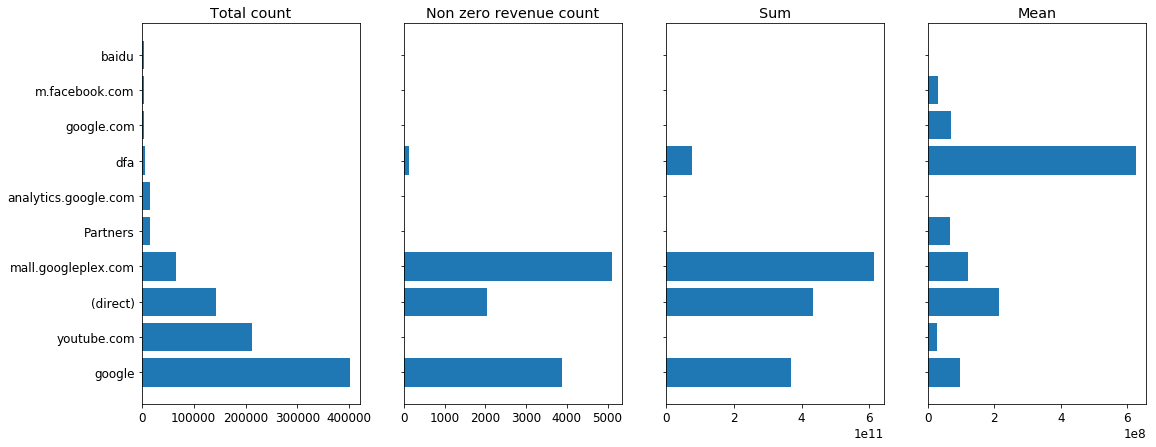

In [12]:
cnt_srs = train.groupby('trafficSource_source')['totals_transactionRevenue'].agg(['size', 'count', 'mean', 'sum'])
cnt_srs.columns = ['count', 'positive revenue count', 'mean', 'sum']
cnt_srs = cnt_srs.sort_values(by='count', ascending=False)
plt.rcParams.update({'font.size': 12})
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(18,7))
ax1.barh(cnt_srs.index[:10], cnt_srs['count'].head(10))
ax1.set_title('Total count')
ax2.barh(cnt_srs.index[:10], cnt_srs['positive revenue count'].head(10))
ax2.set_title('Non zero revenue count')
ax3.barh(cnt_srs.index[:10], cnt_srs['sum'].head(10))
ax3.set_title('Sum')
ax4.barh(cnt_srs.index[:10], cnt_srs['mean'].head(10))
ax4.set_title('Mean')
plt.show()

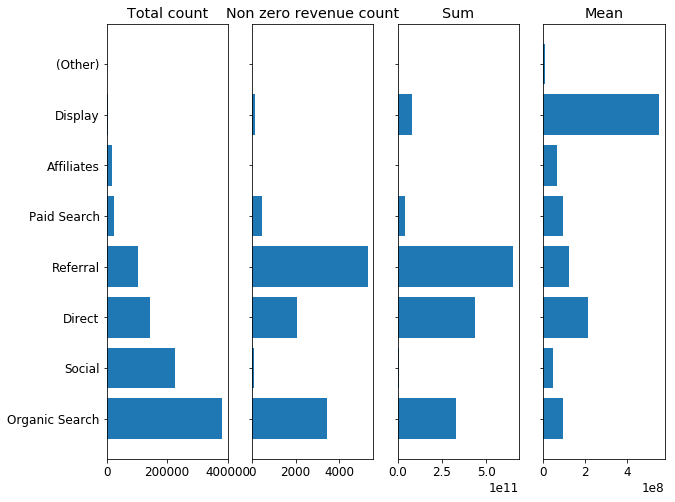

In [13]:
cnt_srs = train.groupby('channelGrouping')['totals_transactionRevenue'].agg(['size', 'count', 'mean', 'sum'])
cnt_srs.columns = ['count', 'positive revenue count', 'mean', 'sum']
cnt_srs = cnt_srs.sort_values(by='count', ascending=False)

plt.rcParams.update({'font.size': 12})
f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, sharey=True, figsize=(10,8))
ax1.barh(cnt_srs.index, cnt_srs['count'])
ax1.set_title('Total count')
ax2.barh(cnt_srs.index, cnt_srs['positive revenue count'])
ax2.set_title('Non zero revenue count')
ax3.barh(cnt_srs.index, cnt_srs['sum'])
ax3.set_title('Sum')
ax4.barh(cnt_srs.index, cnt_srs['mean'])
ax4.set_title('Mean')
plt.show()

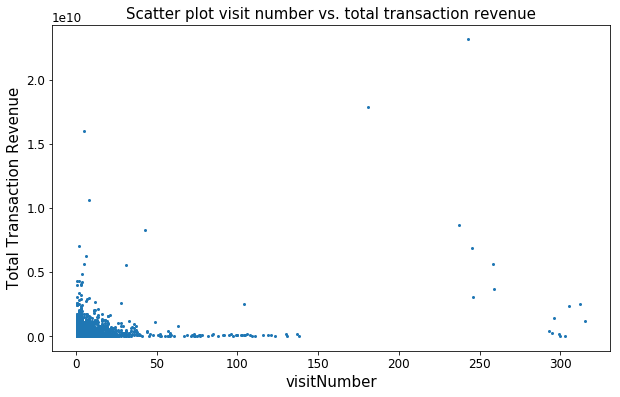

In [14]:
fig, ax = plt.subplots(figsize=(10,6))
ax = plt.scatter(x=train['visitNumber'], y=train['totals_transactionRevenue'], s=4)
plt.xlabel('visitNumber', fontsize=15)
plt.ylabel('Total Transaction Revenue', fontsize=15)
plt.title('Scatter plot visit number vs. total transaction revenue', fontsize=15)
plt.show()

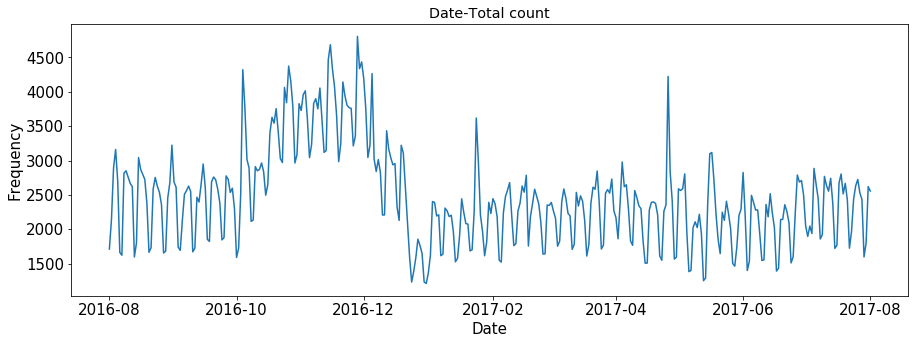

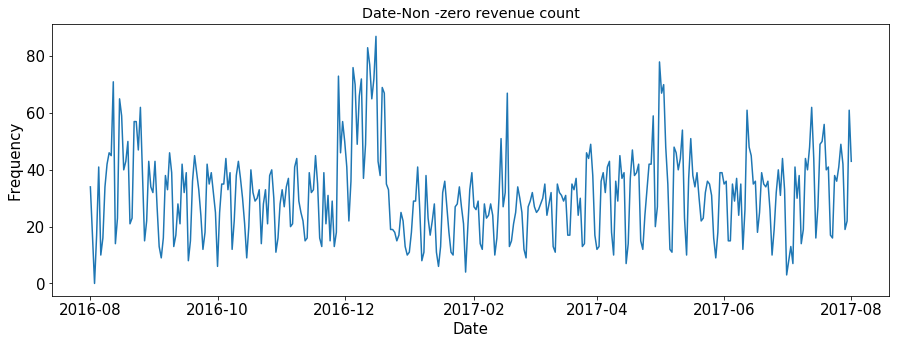

In [15]:
cnt_srs_date = train.groupby('date')['totals_transactionRevenue'].agg(['size', 'count'])
cnt_srs_date.columns = ["count", "count of non-zero revenue"]
cnt_srs_date = cnt_srs_date.sort_index()
plt.rcParams.update({'font.size': 12})
# f, (ax1, ax2) = plt.subplots(2, 1, figsize=(10,8))

cnt_srs_date['count'].plot(figsize = (15,5), fontsize=15, title='Date-Total count')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()
cnt_srs_date['count of non-zero revenue'].plot(figsize = (15,5), fontsize=15, title='Date-Non -zero revenue count')
plt.xlabel('Date', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.show()

In [16]:
train1 = train
test1 = test

In [17]:
# # PPP
# external = pd.read_csv('../input/External Data/Final_data.csv')

# PPP_dict = {}
# for i in range(len(external)):
#     PPP_dict[external.iloc[i]['Country']] = int(external.iloc[i]['PPP'])

# def countryPPP(country):
#     if country in PPP_dict:
#         return PPP_dict[country]
#     return 0 

# train['PPP'] = train['geoNetwork_country'].apply(countryPPP)
# test['PPP'] = test['geoNetwork_country'].apply(countryPPP)

# # cnt =0
# # for i in range(len(train)):
# #     if train.iloc[i]['PPP'] == 0:
# #         cnt+=1
# #         print(train.iloc[i]['geoNetwork_country'])
# # print(cnt)

In [18]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.cross_validation import train_test_split
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

train['totals_transactionRevenue'].fillna(0, inplace=True)
train['totals_transactionRevenue'] = np.log1p(train['totals_transactionRevenue'])

col_list = ['channelGrouping', 'sessionId', 'device_browser', 'device_deviceCategory', 'device_isMobile', 
            'device_operatingSystem', 'geoNetwork_city', 'geoNetwork_continent', 'geoNetwork_country', 
            'geoNetwork_metro', 'geoNetwork_networkDomain', 'geoNetwork_region', 'geoNetwork_subContinent', 
            'trafficSource_adContent', 'trafficSource_adwordsClickInfo.adNetworkType', 
            'trafficSource_adwordsClickInfo.gclId', 'trafficSource_adwordsClickInfo.isVideoAd', 
            'trafficSource_adwordsClickInfo.page', 'trafficSource_adwordsClickInfo.slot', 'trafficSource_campaign', 
            'trafficSource_isTrueDirect', 'trafficSource_keyword', 'trafficSource_medium', 
            'trafficSource_referralPath', 'trafficSource_source']

train1 = train
test1 = test
for col in col_list:
    print(col)
    label = preprocessing.LabelEncoder()
    label.fit(list(train[col]) + list(test[col]))
    train[col] = label.transform(list(train[col]))
    test[col] = label.transform(list(test[col]))

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


channelGrouping
sessionId
device_browser
device_deviceCategory
device_isMobile
device_operatingSystem
geoNetwork_city
geoNetwork_continent
geoNetwork_country
geoNetwork_metro
geoNetwork_networkDomain
geoNetwork_region
geoNetwork_subContinent
trafficSource_adContent
trafficSource_adwordsClickInfo.adNetworkType
trafficSource_adwordsClickInfo.gclId
trafficSource_adwordsClickInfo.isVideoAd
trafficSource_adwordsClickInfo.page
trafficSource_adwordsClickInfo.slot
trafficSource_campaign
trafficSource_isTrueDirect
trafficSource_keyword
trafficSource_medium
trafficSource_referralPath
trafficSource_source


In [19]:
# import datetime

df_x = train
df_x = df_x.drop(columns = ['totals_transactionRevenue', 'date', 'sessionId', 'fullVisitorId', 'visitId', 'visitStartTime'])
df_y = train['totals_transactionRevenue']


test_x = test
test_x = test_x.drop(columns = ['date', 'sessionId', 'fullVisitorId', 'visitId', 'visitStartTime'])

# #spliting training, testing data
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 3)

# x_train = train[train['date']<=datetime.date(2017,5,31)]
# x_test = train[train['date']>datetime.date(2017,5,31)]
# y_train = np.log1p(x_train["totals_transactionRevenue"].values)
# y_test = np.log1p(x_test["totals_transactionRevenue"].values)

# x_train = x_train.drop(columns = ['totals_transactionRevenue', 'date', 'sessionId', 'fullVisitorId', 'visitId', 'visitStartTime'])
# x_test = x_test.drop(columns = ['totals_transactionRevenue','date', 'sessionId', 'fullVisitorId', 'visitId', 'visitStartTime'])

In [20]:
# #XGBoost
# # from sklearn import ensemble
# import xgboost as xgb

# submissionPath = '/home/urmil/Desktop/submission_xgb.csv'

# #Creating XGB regressor
# XGB = xgb.XGBRegressor(n_estimators=100, learning_rate=0.09, subsample=0.75, max_depth=6, n_jobs = 7)

# #cross validation
# # cross_val_generator = ShuffleSplit()
# # print(cross_val_score(XGB, x_train, y_train, cv = cross_val_generator))

# XGB.fit(x_train,y_train)

# ans = XGB.predict(x_test)

# #mean square error
# mse = np.mean((ans-y_test)**2)
# print('mean square error')
# print(mse)
# # root mean square error
# rmse = np.sqrt(mse)
# print('root mean square error')
# print(rmse)

# # # Make predictions using the testing set
# pred_y = XGB.predict(test_x)

# # # Generating output file
# # pred_y = pd.Series(pred_y, name = 'fare_amount')
# # submission = pd.DataFrame(data=test['key'])
# # submission['fare_amount'] = pred_y
# # print(submission.head())
# # submission.to_csv(submissionPath, sep='\t', index = False)

In [21]:
#LGBM
import lightgbm as lgbm

# creating LGBM regressor
LGBM = lgbm.LGBMRegressor(n_estimators=100, learning_rate=0.03, subsample=0.75, n_jobs = 7)

# cross validation
# cross_val_generator = ShuffleSplit()
# print(cross_val_score(LGBM, x_train, y_train, cv = cross_val_generator))
LGBM.fit(x_train,y_train)

ans = LGBM.predict(x_test)

#mean square error
mse = np.mean((ans-y_test)**2)
print('mean square error')
print(mse)

# root means square error
rmse = np.sqrt(mse)
print('root mean square error')
print(rmse)
org_rmse = rmse

# Make predictions using the testing set
pred_y = LGBM.predict(test_x)

mean square error
2.7396860841072983
root mean square error
1.6551997112455337


In [22]:
sub_df = pd.DataFrame()
sub_df['fullVisitorId'] = test['fullVisitorId']
pred_y[pred_y<0] = 0
sub_df["PredictedLogRevenue"] = np.expm1(pred_y)
sub_df = sub_df.groupby("fullVisitorId")["PredictedLogRevenue"].sum().reset_index()
sub_df.columns = ["fullVisitorId", "PredictedLogRevenue"]
sub_df["PredictedLogRevenue"] = np.log1p(sub_df["PredictedLogRevenue"])
sub_df.to_csv('submission_time.csv', index=False)

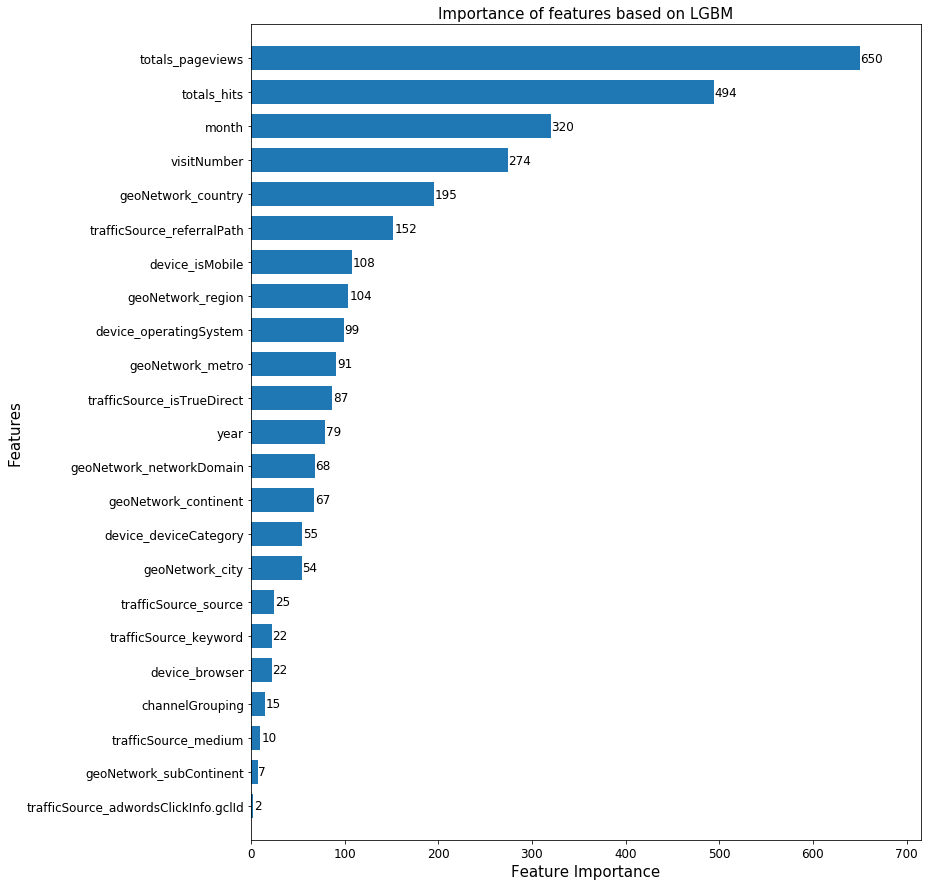

In [23]:
lgbm.plot_importance(LGBM, figsize=(12,15), height=0.7)
plt.grid(False)
plt.title("Importance of features based on LGBM", fontsize=15)
plt.xlabel('Feature Importance', fontsize=15)
plt.ylabel('Features', fontsize=15)
plt.show()

In [24]:
# Permutation test
import lightgbm as lgbm
import seaborn as sns

def LGBMFunction(train):
    df_x = train
    df_x = df_x.drop(columns = ['totals_transactionRevenue', 'date', 'sessionId', 'fullVisitorId', 'visitId'])
    df_y = train['totals_transactionRevenue']

    # Train test split
    x_train1, x_test1, y_train1, y_test1 = train_test_split(df_x, df_y, test_size = 0.2, random_state = 3)    
    
    # creating LGBM regressor
    LGBM = lgbm.LGBMRegressor(n_estimators=100, learning_rate=0.03, subsample=0.75, n_jobs = 7)

    LGBM.fit(x_train1,y_train1)

    per_ans = LGBM.predict(x_test1)

    # mean square error
    per_mse = np.mean((per_ans-y_test1)**2)

    # root means square error
    per_rmse = np.sqrt(per_mse)
    
    return per_rmse

train_ex = train
test_ex = test
result = []
col_list = ['channelGrouping', 'visitNumber', 'device_browser', 'device_deviceCategory', 'device_isMobile', 
            'device_operatingSystem', 'geoNetwork_city', 'geoNetwork_continent', 'geoNetwork_country',
            'geoNetwork_metro', 'geoNetwork_networkDomain', 'geoNetwork_region', 'geoNetwork_subContinent', 
            'totals_bounces', 'totals_hits', 'totals_newVisits', 'totals_pageviews', 'trafficSource_adContent', 
            'trafficSource_adwordsClickInfo.adNetworkType', 'trafficSource_adwordsClickInfo.gclId', 
            'trafficSource_adwordsClickInfo.isVideoAd', 'trafficSource_adwordsClickInfo.page', 
            'trafficSource_adwordsClickInfo.slot', 'trafficSource_campaign', 'trafficSource_isTrueDirect', 
            'trafficSource_keyword', 'trafficSource_medium', 'trafficSource_referralPath', 'trafficSource_source', 
            'month', 'year']

col_list_imp = ['totals_pageviews', 'totals_hits', 'month', 'visitNumber', 'geoNetwork_country', 
                'trafficSource_referralPath', 'device_isMobile', 'geoNetwork_region', 'device_operatingSystem', 
                'geoNetwork_metro']

permutations = 100
pvalue_dict={}
for col in col_list:
    result = []
    for i in range(permutations):
        train_ex[col] = np.random.permutation(train_ex[col])
        result.append(LGBMFunction(train_ex))
    train_ex[col] = train[col]
    print(col)
    print(result)
    pvalue = sum(i < org_rmse for i in result) / permutations
    pvalue_dict[col] = pvalue
    print(pvalue)
    fig, ax = plt.subplots(figsize=(8,5))
    ax = sns.distplot(result, bins=30)
    ax.set_title("Permutation histogram for %s" %col)
    ax.set(xlabel='RMSE', ylabel='Frequency')
    plt.axvline(org_rmse, color='k', linestyle='dashed', linewidth=2)
    plt.show()
    

In [29]:
# Q4 using logistic regression and SMOTE

from sklearn.linear_model import LogisticRegression
from imblearn.over_sampling import SMOTE

def buyOrNot(revenue):
    if revenue > 0:
        return 1
    return 0

df_x = train
df_x = df_x.drop(columns = ['totals_transactionRevenue', 'date', 'sessionId', 'visitId'])
df_x_cols = df_x.columns
df_y = train['totals_transactionRevenue']

# Spliting the data in the training and validation 
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size = 0.2, random_state = 3)

# converting the transition revenues to the binary classifications
y_train = y_train.apply(buyOrNot)
y_test = y_test.apply(buyOrNot)

# Filling NaN with zeros
x_train = x_train.fillna(0)
y_train = y_train.fillna(0)
x_test = x_test.fillna(0)
y_test = y_test.fillna(0)

# Generating sythentic data to balance the imbalanced classes
sm = SMOTE(random_state=2)
x_train, y_train = sm.fit_sample(x_train, y_train.ravel())

# Converting Numpy matrices to the dataframes and rounding the catagorical variable to the nearist integer
x_train = pd.DataFrame(x_train, columns=df_x_cols)
x_train = x_train.round(0)
y_train = pd.DataFrame(y_train, columns=['buyOrNot'])
y_train = y_train.round(0)
for col in x_train.columns:
    x_train[col] = x_train[col].astype(int)
y_train['buyOrNot'] = y_train['buyOrNot'].astype(int) 

# Dropping the fullVisitorId column from the training and validation dataframes
visitorID = x_test['fullVisitorId']
x_train = x_train.drop(columns = ['fullVisitorId'])
x_test = x_test.drop(columns = ['fullVisitorId'])

# creating the logistic regression model
logreg = LogisticRegression(random_state=0, solver='lbfgs')

# fitting logistic regression model
logreg.fit(x_train,y_train)

# final score of the model
print("Final score:", logreg.score(x_test,y_test))

#Classification probability for every user
result = logreg.predict_proba(x_test)

# Matching the fullvisitorId with their respective probability to be in the positive revenue class
oneProb = {}
for i in range(len(result)):
    oneProb[visitorID.iloc[i]] = result[i][1]
sorted_by_value = sorted(oneProb.items(), key=lambda kv: kv[1], reverse=True)
print("Top 10")
for i in range(10):
    print(sorted_by_value[i][0])

/opt/conda/lib/python3.6/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Final score: 0.01290315441180539
Top 10
2079392826608109728
2182591763226364361
3718052351050617153
2192193940277396287
8119290665759168213
3390105384430601511
9472927015509997056
3288761792927926647
4645782780585783387
7758212358673872202


In [36]:
# Q4 using ad-hoc method

f = {'visitNumber':['sum'], 'totals_transactionRevenue':['sum']}
q4_df = train.groupby('fullVisitorId').agg(f)
q4_df.columns = ['totalVisitNumber', 'totalRevenue']
q4_df1 = q4_df.drop(q4_df[q4_df.totalVisitNumber < 10].index)
topUsers = [ (row.totalRevenue*1.0)/row.totalVisitNumber for index, row in q4_df1.iterrows() ]
q4_df1['topUsers'] = topUsers
q4_df1 = q4_df1.sort_values(by='topUsers', ascending=False)
q4_df1.head(10)

,totalVisitNumber,totalRevenue,topUsers
fullVisitorId,,,
4140559214164857738,10,75.094944,7.509494
5215840735346366486,10,74.738088,7.473809
1900860815673587826,15,94.326266,6.288418
5689475961693395998,10,56.390600,5.639060
1255368394012652243,10,56.161559,5.616156
636983386776288406,10,54.904546,5.490455
1383687428379664179,10,54.630173,5.463017
327132720272185354,10,53.183204,5.318320
067516997967648879,10,52.953387,5.295339
